<h1 dir = "ltr">Developing a customer retention strategy 
<h2 dir="ltr">Introduction</h2>
<div dir="ltr">The following report contains a detailed analysis of customer profiles from the gym chain Model Fitness. The report includes a pre-analysis of the data and examination of the following:  <br/>
<ol>
    <li>Predicting the probability of churn (for the upcoming month) for each customer</li>
    <li>Drawing typical user portraits</li>
    <li>Analysing the factors that impact churn most</li>
    <li>Recommendations on how to improve customer service: <ul><li>Identifying target groups</li>
                                                               <li>Suggesting measures to cut churn</li></ul>
    </ol>
The analysis was performed in order to find the best customer retention strategy. <br>
The report consists of the following sections:
<ul>
    <li><a href="#step1">Obtaining data, and preliminary evaluation of data quality</a></li>
    <li><a href="#step2">Pre-processing of the obtained data:</a></li>
        <ul>
            <li><a href="#nun">Missing values</a></li>
            <li><a href="#type">Data type</a></li>
            <li><a href="#dup">Duplicates</a></li>
        </ul>
    <li><a href="#step2.2">Exploratory data analysis (EDA):</a></li>
        <ul>
            <li><a href="#2one">Looking for missing features</a></li>
            <li><a href="#2two">Differences in mean feature values between churn and non-churn</a></li>
            <li><a href="#2three">Feature distributions for churn and non-churn</a></li>
            <li><a href="#2four">Correlation matrix</a></li>
        </ul>
    <li><a href="#step3">Building a model to predict user churn</a></li>
    <li><a href="#step4">Create user clusters:</a></li>
        <ul>       
                    <li><a href="#4one">Agglomerative hierarchical clustering </a></li>
                    <li><a href="#4two">K-means</a></li>
                    <li><a href="#4three">Mean feature values for clusters </a></li>
                    <li><a href="#4four">Plotting distributions of features for the clusters</a></li>
                    <li><a href="#4five">Churn rate of each cluster </a></li>
        </ul> 
    <li><a href="#conclusion">Final conclusions and recommendations</a></li>
</ul>

</div>

###  <a id="step1"></a>Obtaining data, and preliminary evaluation of data quality

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as mth
!pip install --upgrade plotly
!pip install --upgrade seaborn
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install imbalanced-learn
!pip install imblearn
!pip install delayed
from imblearn.over_sampling import SMOTE

Requirement already up-to-date: plotly in c:\users\danie\anaconda3\lib\site-packages (4.14.3)
Requirement already up-to-date: seaborn in c:\users\danie\anaconda3\lib\site-packages (0.11.1)


In [2]:
try:
    gym = pd.read_csv('gym_churn_us.csv')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

gym.info()
gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


###  <a id="step2"></a>Pre-processing of the obtained data:

#### <a id="nun"></a>Missing values

In [5]:
gym.isnull().sum().sum()

0

#### <a id="type"></a> Data type  

In [7]:
binary_columns_list = ['gender','Near_Location','Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
for c in binary_columns_list:
    gym[c] = gym[c].astype(bool)
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   Near_Location                      4000 non-null   bool   
 2   Partner                            4000 non-null   bool   
 3   Promo_friends                      4000 non-null   bool   
 4   Phone                              4000 non-null   bool   
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   bool   
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### <a id="dup"></a>Duplicates

In [6]:
len(gym[gym.duplicated()])


0

###  <a id="step2.2"></a>Exploratory data analysis (EDA):

####  <a id="2one"></a>Looking for missing features

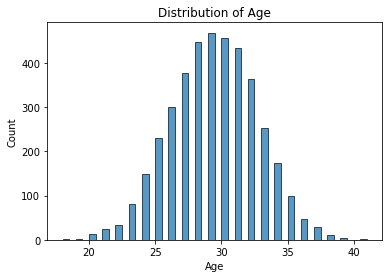

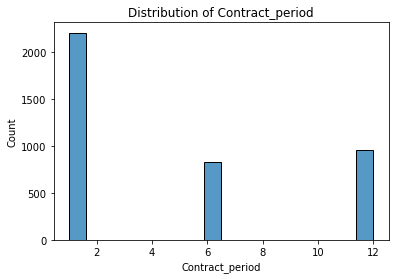

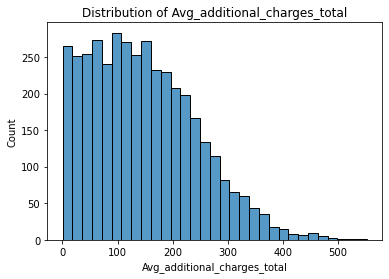

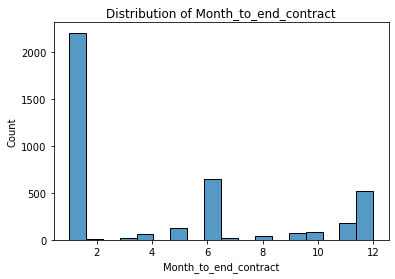

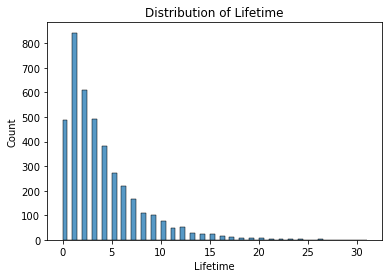

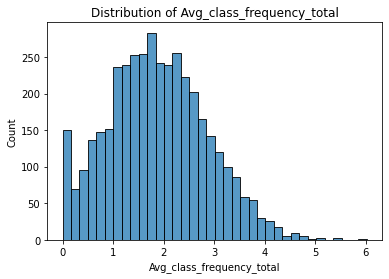

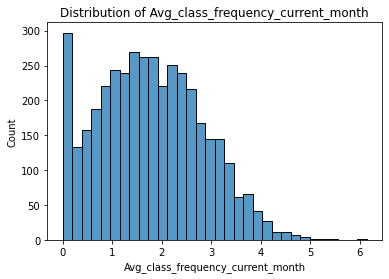

In [8]:
non_binary_features_list = ['Age', 'Contract_period', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month',]
for c in non_binary_features_list:
    plt.Figure()
    sns.histplot(data = gym, x=c)
    plt.title('Distribution of '+ c)
    plt.show()

We looked at the distributions of all non-binary features. Though we have some skewed features, the values seems reasonable, therefore we did not remove outliers. 

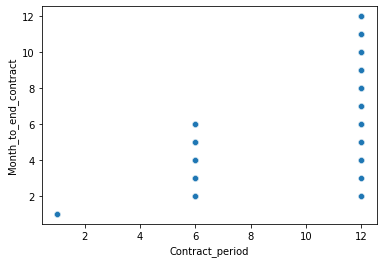

In [9]:
sns.scatterplot(data = gym, x='Contract_period', y='Month_to_end_contract')

We looked at the relation between contract period and the month to end contract and verified there are no non-logic values (number of month left higher than contract period).

#### <a id="2two"></a>Differences in mean feature values between churn and non-churn

In [ ]:
gym.groupby('Churn').mean()


We can see that there are big differences between the churn and non-churn groups, especially in these categories:
Contract_period, Group_visits, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month. In all these parameters, the non-churn customers have higher values.

#### <a id="2three"></a>Feature distributions for churn and non-churn

<Figure size 432x288 with 0 Axes>

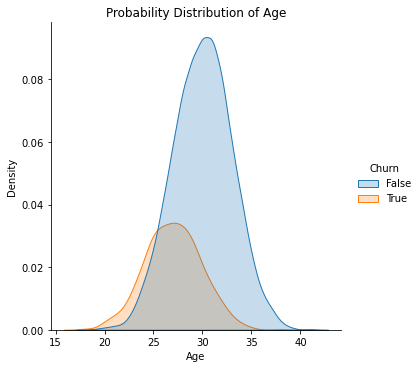

<Figure size 432x288 with 0 Axes>

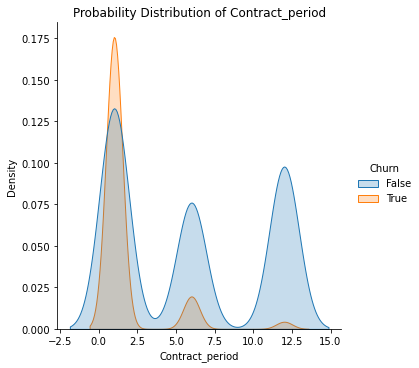

<Figure size 432x288 with 0 Axes>

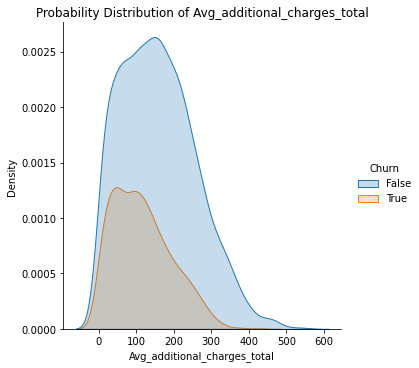

<Figure size 432x288 with 0 Axes>

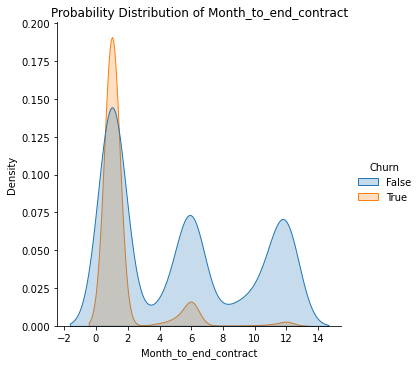

<Figure size 432x288 with 0 Axes>

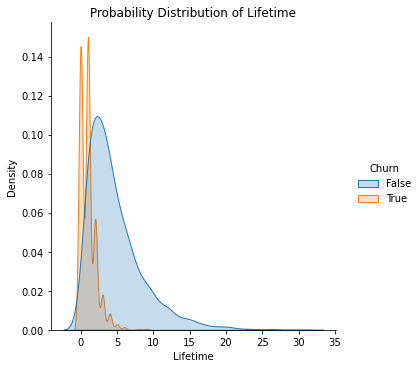

<Figure size 432x288 with 0 Axes>

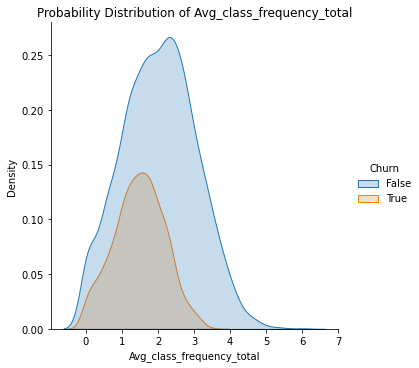

<Figure size 432x288 with 0 Axes>

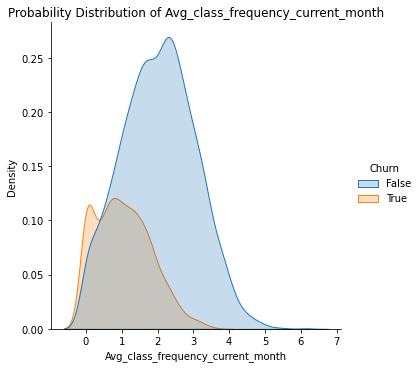

In [10]:
features_list = gym.columns
for feature in non_binary_features_list:
    plt.figure()
    sns.displot(gym, x=feature, hue="Churn", kind="kde", fill=True)
    plt.title('Probability Distribution of '+feature)
    plt.show();

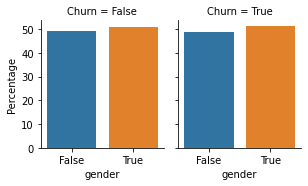

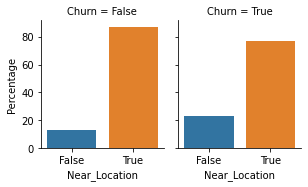

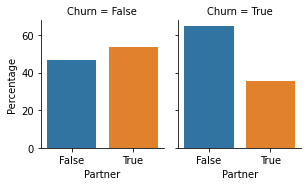

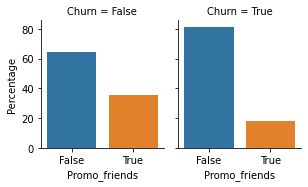

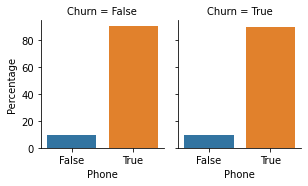

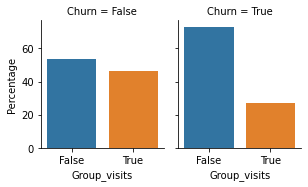

In [11]:
binary_columns_list_churn = ['gender','Near_Location','Partner', 'Promo_friends', 'Phone', 'Group_visits']
for feature in binary_columns_list_churn:
    feature_summary = gym.groupby('Churn')[feature].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    plt_binary =sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col='Churn'
                , kind='bar'
                , height=2.5
                , col_wrap=4
                , aspect = 0.8
                )

Feature distributions for those who left (churn) and those who stayed:  
In total we can say that there are several feature which are different between churn and non-churn.  
From the distributions above we can profile the churn users. Churn customers, vs. non-churn customers are likely to be: 
- Not an employee of a partner company
- Younger 
- Have contrat period of a month, therefore they also have a month to end their contract
- Spend less additional charge
- Have shorter lifetime 
- Attend less classes in total and in the current month as well  


#### <a id="2four"></a>Correlation matrix

In [12]:
stayed = gym[gym['Churn'] == 0].drop(['Churn'], axis=1)
left = gym[gym['Churn'] == 1].drop(['Churn'], axis=1)


Text(0.0, 1.0, 'CORRELATION MATRIX\nNon-Churn Customers\n')

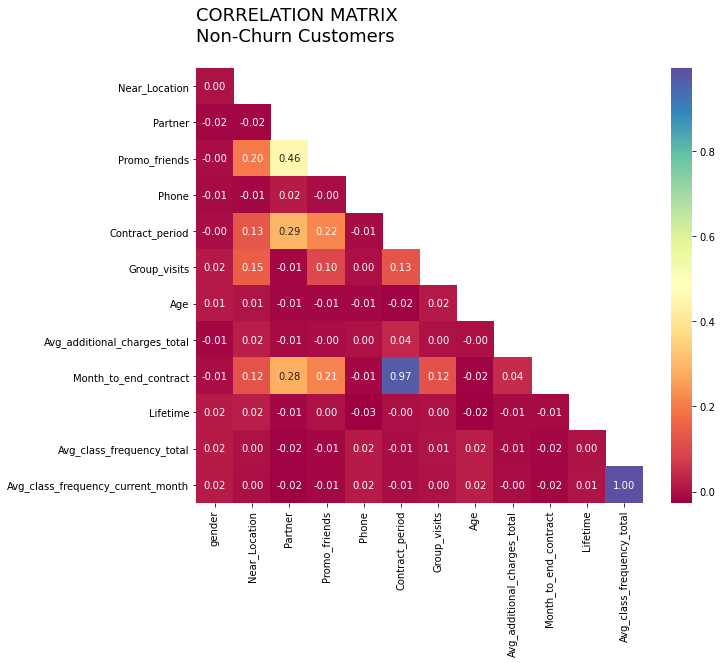

In [13]:
corr_stayed = stayed.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_stayed, dtype=np.bool))
mask = mask[1:, :-1]
corr_ = corr_stayed.iloc[1:,:-1].copy()
cmap = sns.color_palette("Spectral", as_cmap=True)

sns.heatmap(corr_, mask=mask, cmap=cmap, annot=True, fmt=".2f")
title = 'CORRELATION MATRIX\nNon-Churn Customers\n'
plt.title(title, loc='left', fontsize=18)
           

Text(0.0, 1.0, 'CORRELATION MATRIX\nChurn Customers\n')

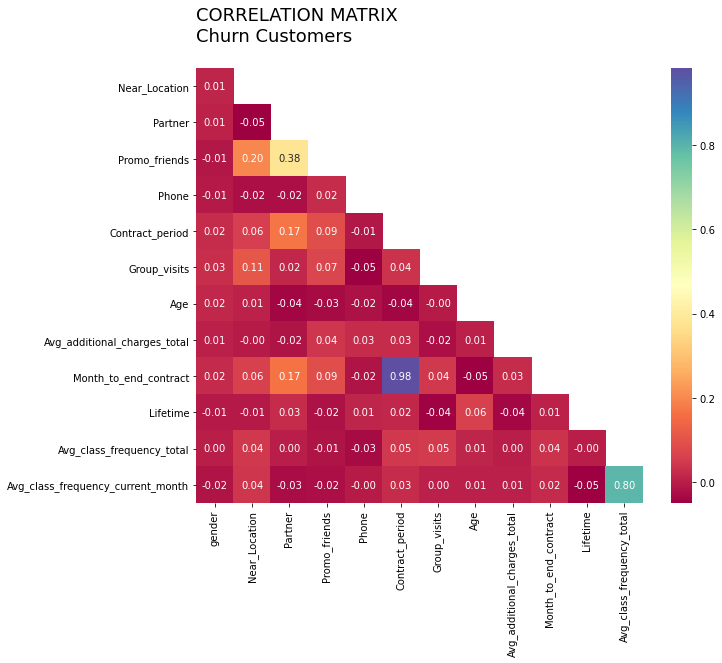

In [14]:
corr_left = left.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_left, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr_left.iloc[1:,:-1].copy()
cmap = sns.color_palette("Spectral", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")
title = 'CORRELATION MATRIX\nChurn Customers\n'
plt.title(title, loc='left', fontsize=18)
           

Correlation matrix:  
We can see that the correlation matrix of churn and non-churn customers looks pretty similar. In both, most of the features does not correlate. There are two features-couples that have correlation value of 0.8 or more - there are high correlations between contract period and the time to end contract and between avg class frequency total and avg class frequency current month. We have to remove one of each couple, since high correlation interrupt with coefficient estimation. Therefore, we will remove Avg_class_frequency_total and Month_to_end_contract columns.
In general, most of the features does not correlate. Several features do correlated, regardless of churn/non-churn status.


In [15]:
gym_reduce = gym.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis = 1)


### Sammary
To summarize this part, we can see that there are several significant differences between churn and non-churn customers. Therefore, this dataset seems suitable for Machine Learning prediction of Churn.  
Non-churn customers (relative to churn customers) have longer contract period and longer period to end contract, are older, pay more additional charge, have longer lifetime, attend more class in general and in the current month and are employees of a partner company.  
Only few features have correlation to other features, and this correlation is churn status independent. High correlation interrupt with coefficient estimation. Therefore, two features with correlation value equal or higher than 0.8 were deleted: Avg_class_frequency_total and Month_to_end_contract.

### <a id="step3"></a>Building a model to predict user churn

In [16]:
print('Number of non-churn customers: ',stayed.Age.count())
print('Number of churn customers: ',left.Age.count())
print('Ratio between churn to non-churn customers: {:.2f}'.format(left.Age.count()/stayed.Age.count()))
print('Share of non-churn customers: {:.2f}'.format(stayed.Age.count()/gym.Age.count()))

Number of non-churn customers:  2939
Number of churn customers:  1061
Ratio between churn to non-churn customers: 0.36
Share of non-churn customers: 0.73


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

X = gym_reduce.drop(['Churn'], axis = 1)
y = gym_reduce['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Creating SMOTE data and checking to see what the class balance looks like now
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_resample(X_train_st, y_train)
 
print ('Number of customer in each class - raw data:' ,np.unique(y_train, return_counts=True))
print ('Number of customer in each class - after applying SMOTE: ', np.bincount(y_train_smote))

Number of customer in each class - raw data: (array([False,  True]), array([2351,  849], dtype=int64))
Number of customer in each class - after applying SMOTE:  [2351 2351]


In [18]:
model = LogisticRegression(random_state = 0)

result = model.fit(X_train_st, y_train)

# use the trained model to make a forecast
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]
print('Model: ', model)
print('\n')
print('Metrics for the prediction with raw data:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))
print('\n')
#setting threshold according to the relation between churn and non-churn data
threshold = 0.73

# calculate prediction on the basis of probabilities and the ratio between classes
custom_predictions = [0 if i<threshold else 1 for i in probabilities]
print('Metrics for the prediction with custom threshold:')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))
print('\n')


sm_model = LogisticRegression(random_state = 0)
result_sm = sm_model.fit(x_train_smote, y_train_smote)

# use the trained model to make a forecast
sm_predictions = sm_model.predict(X_test_st)
sm_probabilities = sm_model.predict_proba(X_test_st)[:,1]
print('Metrics for the prediction with smote data:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, sm_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, sm_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, sm_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, sm_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, sm_probabilities)))


Model:  LogisticRegression(random_state=0)


Metrics for the prediction with raw data:
Accuracy: 0.92
Precision: 0.85
Recall: 0.84
F1: 0.84
ROC_AUC: 0.97


Metrics for the prediction with custom threshold:
Accuracy for custom: 0.89
Precision for custom: 0.91
Recall for custom: 0.65
F1 for custom: 0.76


Metrics for the prediction with smote data:
Accuracy: 0.90
Precision: 0.76
Recall: 0.92
F1: 0.84
ROC_AUC: 0.97


In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('Model: ', rf_model)
print('\n')
print('Metrics for the prediction with raw data:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))
print('\n')

rf_custom_predictions = [0 if i<threshold else 1 for i in rf_probabilities]
print('Metrics for the prediction with custome treshold:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_custom_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_custom_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_custom_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_custom_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))
print('\n')

sm_rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
sm_rf_model.fit(x_train_smote, y_train_smote)
# make predictions
sm_rf_predictions= sm_rf_model.predict(X_test_st)
sm_rf_probabilities = sm_rf_model.predict_proba(X_test_st)[:,1]


print('Metrics for the prediction with smote data:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, sm_rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, sm_rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, sm_rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, sm_rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, sm_rf_probabilities)))

Model:  RandomForestClassifier(random_state=0)


Metrics for the prediction with raw data:
Accuracy: 0.91
Precision: 0.85
Recall: 0.77
F1: 0.81
ROC_AUC: 0.96


Metrics for the prediction with custome treshold:
Accuracy: 0.88
Precision: 0.93
Recall: 0.60
F1: 0.73
ROC_AUC: 0.96


Metrics for the prediction with smote data:
Accuracy: 0.91
Precision: 0.83
Recall: 0.84
F1: 0.84
ROC_AUC: 0.96


In [20]:


#Preparing a new df with prediction and probabilities of churn (for the upcoming month) for each customer:
df_prob= X_test.copy()
df_prob['Churn Prediction']= sm_predictions
df_prob['Churn Probability']= sm_probabilities
df_prob['Churn Probability']=df_prob['Churn Probability'].round(2)
df_prob


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn Prediction,Churn Probability
3025,False,True,True,True,True,1,True,27,61.347169,1,0.805638,True,0.94
31,False,True,False,False,True,12,True,32,87.856139,1,0.000000,False,0.18
2017,True,True,False,False,True,12,True,25,243.128113,4,0.935325,False,0.01
55,False,True,True,True,False,1,False,30,194.669178,4,1.900943,False,0.04
2096,True,True,True,False,True,1,False,32,101.187972,5,1.804372,False,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,True,True,False,False,True,1,True,31,281.634345,0,2.184527,False,0.35
3641,False,True,False,False,True,1,False,30,136.218964,0,1.364910,True,0.94
2520,True,True,True,False,True,12,False,30,248.185911,5,1.834113,False,0.00
3395,True,True,False,False,True,1,False,30,145.565687,3,3.731734,False,0.02


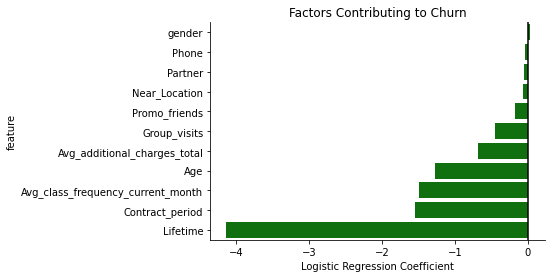

In [21]:
features= list(X_train.columns)
features
# Add features and their importance to the dataframe
logR_coefficient= pd.DataFrame({'feature': features, 'Coefficient': result_sm.coef_.tolist()[0]})

# Sort the dataframe by coefficient value
logR_coefficient= logR_coefficient.sort_values(by='Coefficient', ascending=False )

# plot the dataframe 
sns.barplot(x='Coefficient', y= 'feature', data=logR_coefficient, color='g')
plt.title('Factors Contributing to Churn')
plt.xlabel('Logistic Regression Coefficient')
plt.axvline(x=0, color='black')
sns.despine()

Building a model to predict user churn:  
In this task we tried to predict user churn using two different models: LogisticRegression and RandomForestClassifier. Since we have unbalanced data, with around 1:3 ratio between churn to non-churn customers, and our models assume 1:1 ratio, we had to correct it. We choose 2 different method for correction:  
1. Changing the threshold  
2. Using SMOTE to synthetically create more churn customers and equall the samples.

We tested the following metrics in order to establish which combination of model and correction method will give the best prediction: Accuracy, Precision, Recall, F1 and ROC_AUC. 

Looking at the results, we can see that in each model+method there are some parameters with good performance and some with bad performance. After taking into considerations all parameters, we decided that LogisticRegression model with the SMOTE data present the best prediction.   
These are the results we got:    
Accuracy: 0.90  
Precision: 0.76  
Recall: 0.93  
F1: 0.84  
ROC_AUC: 0.97  
The overall accuracy is 90%. This means that the model accurately predicted whether or not a customer would churn during the next month with 90% accuracy (90% accurate predictions among all predictions). However, because we have imbalanced classes (though corrected with SMOTE), we want to focus more on how well the model performed on the churn cases (the minority class).  
The metric that is most important for us is Recall, because we want to miss as few of the true churn cases as possible. In the model we choose, Recall score is 0.93 - it means that the model was able to catch 93% of the actual churn cases. That's a very good result.   
Precision score in this model is 0.76. A churn Precision of 0.76 is not so good, but it's not a problem because there are no significant consequences of identifying a customer as a churn risk when he isn't.  
F1 score is 0.84 in this model. There is usually a trade off between Precision and Recall, and F1 score give us a balanced idea of how the model is performing.  
The ROC_AUC score in this model is 0.97, which is pretty good. ROC_AUC assesses overall classification performance (it does not reflect the minority class well, but in this model we used SMOTE to equal classes).   
Overall, we got pretty good prediction with LogisticRegression model, when equaling data with SMOTE. 
We also prepared a new df with the predictions and probabilities of each customer from the tested group.
In addition, we looked at the model coefficients values in order to examined each feature effect on churn probability. We can see that all features have either near zero or negative coefficients, which means that the higher the value is, the probability for churn is decreased. The features that impact the most on churn probabilities are lifetime, cotract_period, Avg_class_frequency_current_month and age, in that order.  

### <a id="step4"></a>Create user clusters:

#### <a id="4one"></a>Agglomerative hierarchical clustering

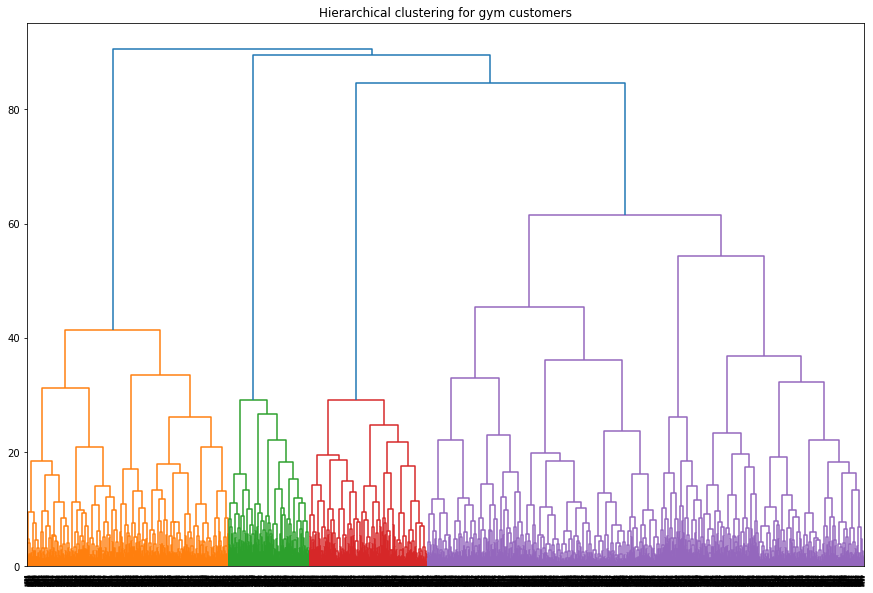

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage 
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym customers')
plt.show()


We used Agglomerative hierarchical clustering in order to find how many clusters we have, and to estimate the similarity between them. The suggested optimal number of clusters is four, which corresponds to the four different colors on the plot. The purple cluster (*the right one) is mostly similar to the red one (the one next to it). Both of these clusters are mostly similar to the green one (the one next to them). The orange cluster is the most different one (the left one). 


#### <a id="4two"></a>K-means

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

gym_reduce['cluster_km'] = labels
gym_reduce.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn,cluster_km
0,True,True,True,True,False,6,True,29,14.227470,3,0.000000,False,2
1,False,True,False,False,True,12,True,31,113.202938,7,1.910244,False,0
2,False,True,True,False,True,1,False,28,129.448479,2,1.736502,False,1
3,False,True,True,True,True,12,True,33,62.669863,2,3.357215,False,3
4,True,True,True,True,True,1,False,26,198.362265,3,1.120078,False,3


#### <a id="4three"></a>Mean feature values for clusters

In [24]:
cluster = gym_reduce.groupby(['cluster_km']).mean().reset_index().sort_values('Churn')
cluster

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,0,0.539745,0.996075,0.373896,0.016683,1.0,6.130520,0.535819,30.734053,177.499332,5.421001,2.321474,0.015702
3,3,0.494888,0.995910,0.898773,1.000000,1.0,6.949898,0.522495,29.577710,153.072750,4.261759,1.916202,0.120654
2,2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
4,4,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
1,1,0.496695,1.000000,0.219075,0.072710,1.0,2.045326,0.280453,27.554297,118.052322,1.913126,1.201059,0.565628


Mean feature values for clusters:  
we can see that each cluster has its unique characteristics  composition. For example, one cluster has 0 near location value, and other cluster has 0 phone value, etc.
In addition, we can see that there are five features that negatively correlates with churn rate: Avg_class_frequency_current_month, lifetime, additional charge, age, and contract period. 
We also have 5 different churn rate values, distributing between 0.01 to 0.55.  
Therefore, we have one cluster, in which churn rate is the lowest and all these features have the highest values, and the rest of the clusters have increasing churn values and decreasing values of all these features.  


#### <a id="4four"></a>Plot distributions of features for the clusters

<Figure size 432x288 with 0 Axes>

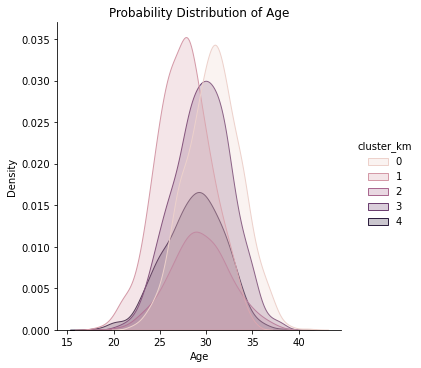

<Figure size 432x288 with 0 Axes>

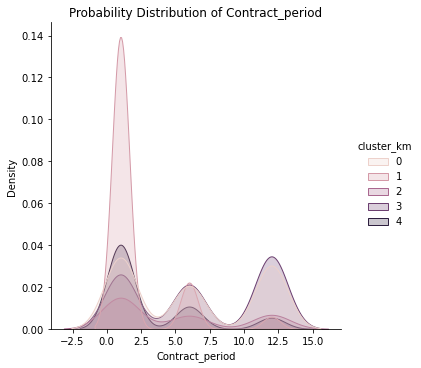

<Figure size 432x288 with 0 Axes>

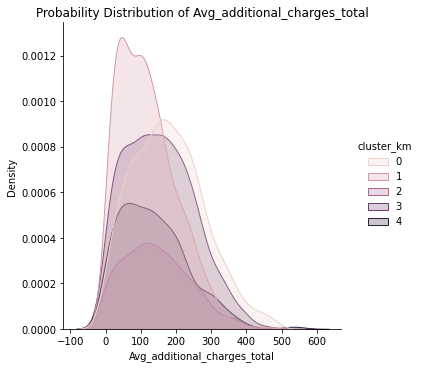

<Figure size 432x288 with 0 Axes>

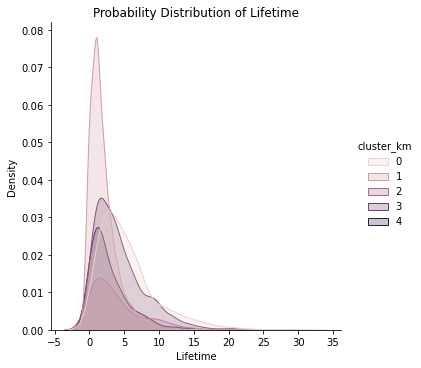

<Figure size 432x288 with 0 Axes>

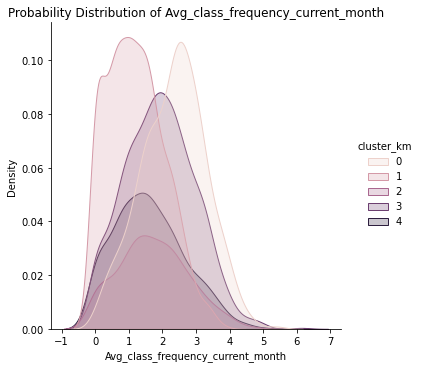

In [25]:
non_binary_features_list_reduced = ['Age', 'Contract_period', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_current_month',]

for feature in non_binary_features_list_reduced:
    plt.figure()
    sns.displot(gym_reduce, x=feature, hue="cluster_km", kind="kde", fill=True)
    plt.title('Probability Distribution of '+feature)
    plt.show();

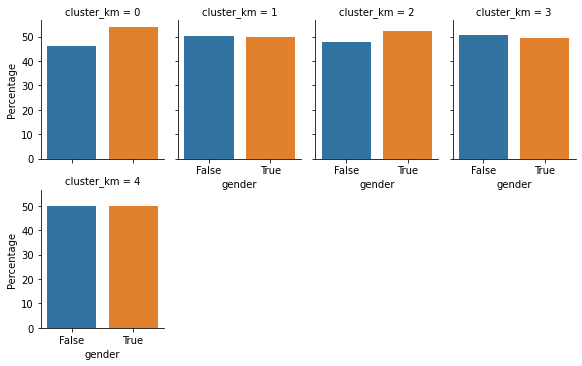

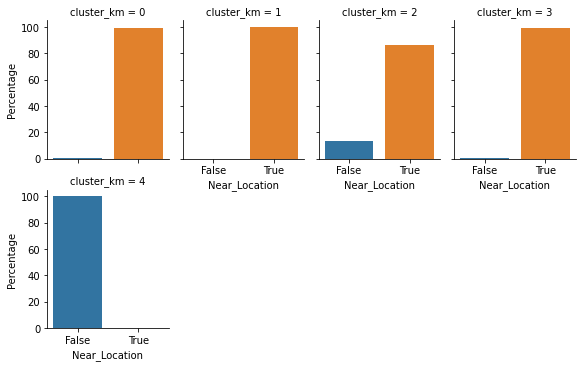

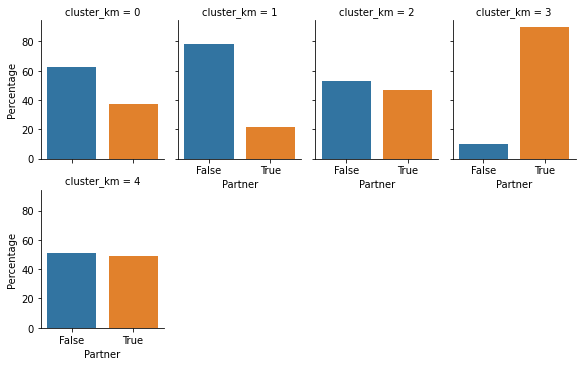

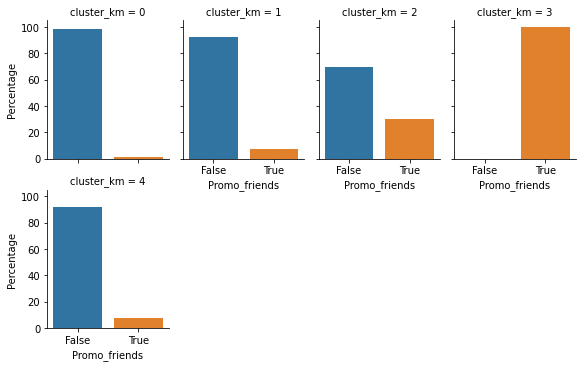

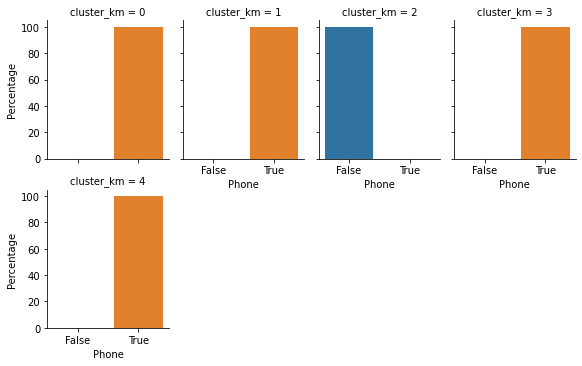

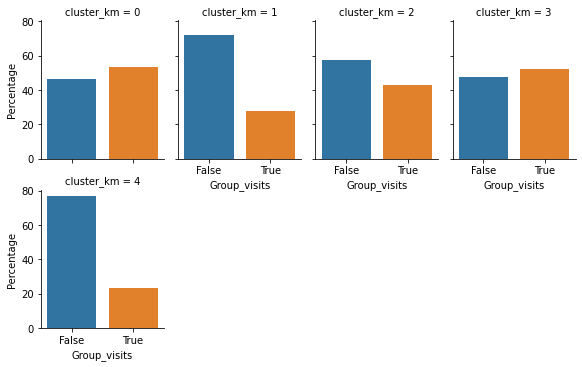

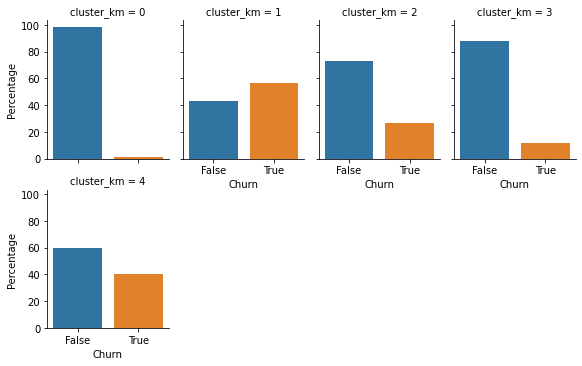

In [26]:
for feature in binary_columns_list:
    feature_summary = gym_reduce.groupby('cluster_km')[feature].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    plt_binary =sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col='cluster_km'
                , kind='bar'
                , height=2.5
                , col_wrap=4
                , aspect = 0.8
                )

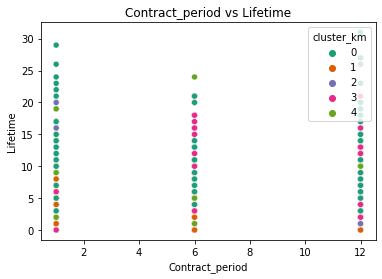

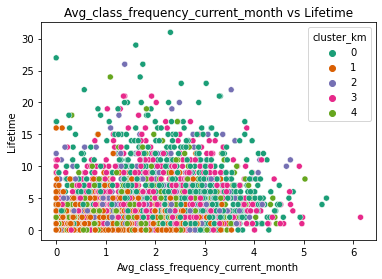

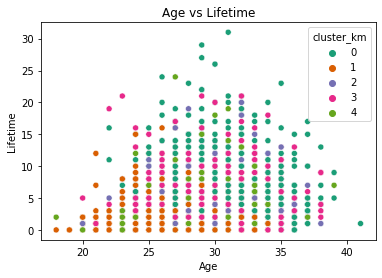

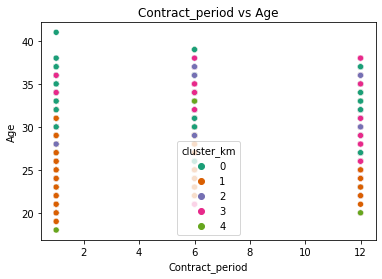

In [27]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure()
    sns.scatterplot(gym_reduce[x_name], gym_reduce[y_name],
           hue = gym_reduce[cluster_name], palette = 'Dark2'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
show_clusters_on_plot(gym_reduce, 'Contract_period','Lifetime', 'cluster_km')
show_clusters_on_plot(gym_reduce, 'Avg_class_frequency_current_month','Lifetime', 'cluster_km') 
show_clusters_on_plot(gym_reduce, 'Age','Lifetime', 'cluster_km') 
show_clusters_on_plot(gym_reduce, 'Contract_period','Age', 'cluster_km') 


We looked at the features distribution in the different clusters. In most of the features we see differences between the different clusters, but the main difference is between the two clusters with opposite churn rate values.  
We tried to see paired distribution of the features that we found to affect most at churn rate, and also here we mainly see the clusters of the two opposite  clusters - the one with the highest and the lowest churn rate. 

#### <a id="4five"></a>Churn rate of each cluster

In [ ]:
cluster_churn = gym_reduce.groupby(['cluster_km'])['Churn'].mean().reset_index()
cluster_churn

Churn rate of each cluster:  
We can see that there are 5 different churn rate, from near zero to around 0.55. We already profile the gym customers and saw that value in the  Avg_class_frequency_current_month, lifetime, additional charge, age, and contract period features are negatively correlated with low churn rate. So the most loyal customers are old, joined to the gym long time age, have a contract for few month, attend classes and pay high amount of additional charge.

### <a id="conclusion"></a>Final conclusions and recommendations

In this report we analyse the features of customers from the gym chain Model Fitness. The purpose of this report is developing a customer retention strategy based on analytical data.  
First we wanted to make sure that the data is suitable for Machine Learning prediction of Churn. We examined the features distribution within churn and non-churn customers, and we saw that there are several significant differences. Thus, the dataset is suitable for Machine Learning prediction of Churn. We build a preliminary profile of churn customers. Compared with non-churn customers, they are:
- Younger 
- Have contract period of a month, therefore they also have a month to end their contract
- Spend less additional charge
- Have shorter lifetime 
- Attend less classes in total and in the current month as well 
- Not an employee of a partner company 

Next, we looked at feature correlation. High correlation might interrupt the algorithm prediction. Only few features have correlation to other features. Two features-couples have correlation value equal or higher than 0.8, and were deleted:  Avg_class_frequency_total and Month_to_end_contract.  
The next step was finding the right model, that would give us the best prediction. Since we have imbalanced data, with around 1:3 ratio between churn to non-churn customers, and our models assume 1:1 ratio, we had to correct it. We tested 2 different methods for correction, and two different models and found that LogisticRegression model with the SMOTE data present the best prediction.     
These are the metrics values:   
Accuracy: 0.90  
Precision: 0.76  
Recall: 0.93  
F1: 0.84  
ROC_AUC: 0.97  
Since Recall is the most important metric for us (because we dont want to miss any true churn customer), we focused in achieving the best result in this metric. In the model we choose, Recall score is 0.93 - it means that the model was able to catch 93% of the actual churn cases, which is a very good result.   
Overall, we got pretty good prediction with LogisticRegression model, when equalling data with SMOTE.  
In addition, we looked at the model coefficients values in order to examine each feature effect on churn probability. We can see that all features have either near zero or negative coefficients, which means that the higher the value is, the probability for churn is decreased. The features that impact the most on churn probabilities are lifetime, cotract_period, Avg_class_frequency_current_month and age, in that order.  
In the next step we wanted to build customers clusters, in order to adjust specific strategy to each cluster to prevent churn.  First we did Agglomerative hierarchical clustering in order to find the best fitted number of clusters. Then we used KMeans to find the characteristic of each cluster. We found five features that negatively correlates with churn rate:  Avg_class_frequency_current_month, lifetime, additional charge, age, and contract period.  
Therefore, we have one cluster, in which churn rate is the lowest and all these features have the highest values, and the rest of the clusters have increasing churn values and decreasing values of all these features. Therefore, according to the clustering, a churn customer profile would be exactly as describe above, apart from the partner feature, as we did not see correlation between churn rate and Partner score. 

### Recommendations:
Based on our finding, we would recommend the following marketing strategies:
- Focus marketing efforts in new customers. We have seen a strong negative coefficient value for lifetime. It means that if we manage to prevent churn within the first months, the likelihood  of keeping the customer further on increases.
- Advertise special offers for longer contract period. Also here we saw that long contract period correlates with decreased churn rate.
- In order to increase class attendances  frequency, we should perform a survey among new customers regarding classes preferences. We should consider adding new classes alternative that might increases class frequently.
- Since additional charge also negatively correlates with churn, we should invest marketing effort on those additional products.
- Regarding customer age - we cannot affect the age of existing customers, obviously, but we can invest in advertisment aimed to people at their mid-30.